## <center> 7. Применение ООП для работы с файлами

На самом деле **файлы**, как и всё в *Python*, **являются объектами класса**. Причём этот класс встроен в *Python*. **У файлов есть свои атрибуты и методы.**

**ПУТЬ К ФАЙЛУ**

**Путь** (от англ. *path*) — набор символов, показывающий расположение файла или каталога в файловой системе.

В операционных системах *UNIX* разделительным знаком при записи пути является «/» (слеш), в *Windows* — «\» (обратный слеш). Эти знаки служат **для разделения названия каталогов, составляющих путь к файлу**. Все вы видели, например, такой путь на ОС Windows: `C:\Program Files. Это и есть путь до папки Program Files.`

Существует **два типа** пути:

- абсолютный;
- относительный.

**Абсолютный** путь всегда **считается от «корня»**, той папки, откуда потом «вырастают» все остальные папки. Для Windows это диск С:, D: и т. д., для Unix это “/”. Абсолютный путь **всегда уникальный**.

**Абсолютный путь** — это путь, который указывает на одно и то же место в файловой системе, вне зависимости от текущего рабочего каталога или других обстоятельств. Его ещё называют полным.

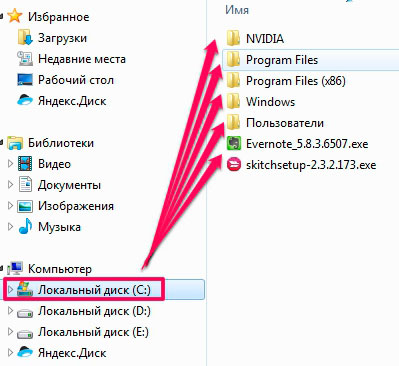

**Относительный путь** — это путь по отношению к текущему рабочему каталогу пользователя.

Чтобы поработать с путями, есть модуль `os`. Функция `os.chdir()` позволяет нам **изменить директорию, которую мы в данный момент используем**. Если вам нужно знать, какой путь вы в данный момент используете, для этого нужно вызвать `os.getcwd()`.

In [2]:
import os
# Получить текущий путь
smart_path = os.getcwd()
print(smart_path)

/workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода


In [3]:
# Подняться на директорию (на один уровень) выше
os.chdir('..')
os.getcwd()

'/workspaces/st_data_science/Skillfactory'

In [4]:
# Теперь вернемся в ту директорию, из которой стартовали. 
# Изначально мы сохраняли её в переменной start_path.
os.chdir(smart_path)
os.getcwd()

'/workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода'

С помощью функции `os.listdir()` можно получить весь список файлов, находящихся в директории. Если не указать никаких аргументов, то будет взята текущая директория.

In [5]:
# Список файлов и директорий в папке

print(os.listdir())

if 'tmp.py' not in os.listdir():
    print('Файл отсутствует в директории')

['7-9 Применение ООП для работы с файлами.ipynb', 'Проверка знаний.ipynb', 'data', 'archive', '.ipynb_chekpoint', 'text.txt', 'Принципы ООП.ipynb']
Файл отсутствует в директории


Для того чтобы склеивать пути с учётом особенностей ОС, следует использовать функцию `os.path.join()`. Это связано с тем, что в **разных операционных системах могут быть разные разделители каталогов**, например в ОС Windows этим разделителем является «\», а в Linux — «/», как мы и говорили в начале юнита. Поэтому, **чтобы поиск файла проходил гладко в обеих системах** (ведь ваш скрипт могут запускать на любой системе в связи с кросс-платформенностью Python), **лучше всё-таки использовать** `os.path.join()`.

In [6]:
# соединяет пути с учётом особенностей операционной системы
print(smart_path)
print(os.path.join(smart_path, 'test'))

# /home/nbuser/library
# /home/nbuser/library/test

/workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода
/workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода/test


**Задание 7.3**
Задание на самопроверку.

Сделайте функцию, которая принимает от пользователя путь и выводит всю информацию о содержимом этой папки. Для реализации используйте функцию встроенного модуля `os.walk()`. Если путь не указан, то сравнение начинается с текущей директории.

In [7]:
import os

def walk_desc(path=None):
    start_path = path if path is not None else os.getcwd()

    for root, dirs, files in os.walk(start_path):
        print('Текущая директория', root)
        print('---')

        if dirs:
            print('Список папок', dirs)
        else:
            print('Папок нет')
        print('---')

        if files:
            print('Список файлов', files)
        else:
            print('Файлов нет')
        print('---')

        if files and dirs:
            print('Все пути:')
        for f in files:
            print('Файл ', os.path.join(root, f))
        for d in dirs:
            print('Папка ', os.path.join(root, d))
        print('===')

walk_desc()


Текущая директория /workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода
---
Список папок ['data', 'archive', '.ipynb_chekpoint']
---
Список файлов ['7-9 Применение ООП для работы с файлами.ipynb', 'Проверка знаний.ipynb', 'text.txt', 'Принципы ООП.ipynb']
---
Все пути:
Файл  /workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода/7-9 Применение ООП для работы с файлами.ipynb
Файл  /workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода/Проверка знаний.ipynb
Файл  /workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода/text.txt
Файл  /workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода/Принципы ООП.ipynb
Папка  /workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода/data
Папка  /workspaces/st_data_science/Skillfactory/15 - Принципы ООП в Python и отладка кода/archive
Папка  /workspaces/st_data_science/Skillfactory/15 - Пр

**РАБОТА С ФАЙЛАМИ**

Для того чтобы начать работать с файлом, надо его открыть с помощью команды специальной функции `open`.

In [8]:
#f = open('path\to\file', 'filemode', encoding='utf8')

Результатом этой операции будет файл, в котором указатель текущей позиции поставлен на начало или конец файла.

Перед тем, как мы начнём разбирать аргументы, хотелось бы заранее отметить, что **указателем** называется скорее **метка**, которая **указывает на определённое место в файле**. Указателей в классическом понимании программиста, как, например, в C или C++ в Python нет!

Разберём все **аргументы**:

1. `path/to/file` — путь к файлу может быть относительным или абсолютным. Можно указывать в *Unix*-стиле (`path/to/file`) или в *Windows*-стиле (`path\to\file`).

2. `filemode` — режим, в котором файл нужно открывать.

Записывается в виде строки, может принимать следующие значения:

- `r` — открыть на **чтение** (по умолчанию);
- `w` — **перезаписать и открыть на запись** (если файла нет, то он создастся);
- `x` — **создать** и открыть на запись (если уже есть — исключение);
- `a` — **открыть на дозапись** (указатель будет поставлен в конец);
- `t` — открыть в **текстовом** виде (по умолчанию);
- `b` — открыть в **бинарном** виде.

3. `encoding` — указание, в какой **кодировке** файл записан (*utf8*, *cp1251* и т. д.) По умолчанию стоит *utf-8*. При этом **можно записывать кодировку как через дефис, так и без**: *utf-8* или *utf8*.

**Открытие файла на запись является блокирующей операцией**, то есть она **останавливает** работу нашей программы до того, **пока файл не откроется.**

**Как записывать какую-либо информацию в файл**

При **открытии** файла внутри него ставится указатель текущей позиции для чтения. При открытии в режиме **чтения** ('r') или **записи** ('w') **указатель ставится на начало**, в режиме 'a' **(добавление новых записей в конец файла) — в конец.**


In [9]:
# Откроем файл на запись и с помощью метода write запишем в него 
# строку. В качестве результата метод write возвращает количество 
# записанных символов.
f=open('text.txt', 'w', encoding='utf8')

# Запишем файл в строку
f.write('This is a test string\n')
f.write('This is a new string\n')

21

После вызова команды `write` ваши **данные не сразу попадут и сохранятся в файл**. Связано это с особенностями внутренней работы операционных систем. Если для вас критично своевременное попадание информации на жесткий диск компьютера, то **после записи вызывайте `f.flush()` или закрывайте файл. Закрыть файл можно с помощью метода `close()`.**

In [10]:
# Обязательно нужно закрыть файл, иначе он будет заблокирован
f.close()

Теперь давайте посмотрим, как **читать данные** из файла.

In [11]:
# Откроем файл для чтения, в который записали 2 строки
f = open('text.txt', 'r', encoding='utf8')

Вот его содержимое на жестком диске:

`This is a test string`

`This is a new string`

После того, как файл открыт для чтения, мы можем читать из него данные.

`f.read(n)` — операция, читающая с текущего места *n* символов, если файл открыт в `t` режиме, или *n* байт, если файл открыт в `b` режиме, и возвращающая прочитанную информацию.

In [12]:
print(f.read(10))

This is a 


После прочтения **указатель на содержимое остается на той позиции, где чтение закончилось**. Если n не указать, будет прочитано «от печки», то есть от текущего места указателя и до самого конца файла

In [13]:
# Считали остаток файла
f.read()

'test string\nThis is a new string\n'

In [14]:
# После работы обязательно закрываем файл:
f.close()

**ЧТЕНИЕ И ЗАПИСЬ ПОСТРОЧНО**

Зачастую с файлами удобнее работать построчно, поэтому для этого есть отдельные методы:

- `writelines` — записывает список строк в файл;
- `readline` — считывает из файла одну строку и возвращает её;
- `readlines` — считывает из файла все строки в список и возвращает их.

Метод `f.writelines(sequence)` не будет сам за вас дописывать символ конца строки (`'\n'`), поэтому при необходимости его нужно прописать вручную.

In [15]:
f = open('text.txt', 'r', encoding='utf8')

print(f.readline())
print(f.read(4))
print(f.readline())

f.close()

This is a test string

This
 is a new string



**ФАЙЛ КАК ИТЕРАТОР**

**Объект файл является итератором**, поэтому его можно использовать в цикле `for`.

Предположим, у вас есть огромный текстовый файл, который весит несколько гигабайт. Если попытаться разом считать его полностью с помощью `f.readlines()`, то он будет загружен в вашу программу, в то время как **переменная, в которую будет записан файл, станет весить столько же, сколько и объём считанного файла**.

*Не стоит считывать файл полностью — в большинстве задач с обработкой текста весь файл разом читать не требуется. В таком случае с файлом работают построчно.*

In [16]:
f = open('text.txt') # Можно перечислять строки в файле
for line in f:
    print(line, end='')

f.close()

This is a test string
This is a new string


**МЕНЕДЖЕР КОНТЕКСТА WITH**

После работы с файлом его необходимо закрыть с помощью метода `close()`. Файл освобождается для операционной системы (если он был открыт для записи), и другие приложения могут получать к нему доступ. Если не закрыть файл явно, то информация, записываемая в него, может быть утеряна, или файл может повредиться.

Для явного указания места работы с файлом, а также чтобы не забывать закрывать файл после обработки, существует **менеджер контекста** `with`.

In [17]:
# В блоке менеджера контекста открытый файл жив, и с ним 
# можно работать, при выходе из блока - файл закрывается

with open('text.txt', 'rb') as f:
    a = f.read(10)
    b = f.read(23)

f.read(3)

ValueError: read of closed file

Тело менеджера контекста определяется **одним отступом вправо** относительно отступов ключевого слова `with`. Менеджер контекста неявно вызывает закрытие файла после работы, что освобождает вас от забот о том, закрыли ли вы файл или нет. Закрытие файла происходит при любом стечении обстоятельств, даже если внутри with будет ошибка. 

**Задание 7.4**

Создайте любой файл на операционной системе под название `input.txt `и построчно перепишите его в файл `output.txt`.

In [ ]:
# r - открыть на чтение
with open("input.txt", "r") as input_file:
    # w - перезаписать и открыть на запись
    with open('output.txt', 'w'):
        for line in input_file:
            output_file.write(line)

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'

**Задание 7.5**

Дан файл `numbers.txt`, компоненты которого являются действительными числами (файл создайте самостоятельно и заполните любыми числам, в одной строке одно число). Найдите сумму наибольшего и наименьшего из значений и запишите результат в файл `output.txt`.

In [22]:
#filename = 'numbers.txt'
output = 'output.txt'

# Создаётся список действительных чисел.
numbers = [1.23, 4.56, 7.89]
# Файл открывается в режиме записи («w»).
with open('numbers.txt', 'w') as file:

    min_ = max_ = float(f.readline())  # считали первое число
    for line in f:
        num =  float(line)
        if num > max_:
            max_ = num
        elif num < min_:
            min_ = num

    sum_ = min_ + max_

with open(output, 'w') as f:
    f.write(str(sum_))
    f.write('\n')

UnsupportedOperation: not readable

**Задание 7.6**

В текстовый файл построчно записаны фамилии и имена учащихся класса и их оценки за контрольную. Подсчитайте количество учащихся, чья оценка меньше 3 баллов. Cодержание файла:

Иванов О. 4
Петров И. 3
Дмитриев Н. 2
Смирнова О. 4
Керченских В. 5
Котов Д. 2
Бирюкова Н. 1
Данилов П. 3
Аранских В. 5
Лемонов Ю. 2
Олегова К. 4

In [ ]:


count = 0
for line in open("input.txt"):
    points = int(line.split()[-1])
    if points < 3:
        count += 1

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'

**Задание 7.7**

Выполните реверсирование строк файла (перестановку строк файла в обратном порядке).

In [24]:
with open("input.txt", "r") as input_file:
    with open("output.txt", "w") as output_file:
        for line in reversed(input_file.readlines()):
            output_file.write(line)

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'